<a href="https://colab.research.google.com/github/cz101/ML-TF/blob/main/TF2_CIFAR_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
print(tf.__version__)

2.8.2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import  Input, Conv2D, Flatten, Dense, Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model

In [7]:
cifar_mnist = tf.keras.datasets.cifar10 # 10 classes
(x_train,y_train),(x_test ,y_test) = cifar_mnist.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0
y_train,_test = y_train.flatten(),y_test.flatten()
print("x_train.shape", x_train.shape)
print("y_train.shape",y_train.shape)

x_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)


In [8]:
K= len(set(y_train))
print("number of calsses :",K)

number of calsses : 10


In [9]:
from threading import active_count
i = Input(shape=x_train[0].shape)
# x = Conv2D(32,(3,3), strides=2 ,activation='relu')(i)
# x = Conv2D(64,(3,3), strides=2 ,activation='relu')(x)
# x = Conv2D(128,(3,3), strides=2 ,activation='relu')(x)
x = Conv2D(32,(3,3), activation='relu',padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3), activation='relu',padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3), activation='relu',padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), activation='relu',padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3), activation='relu',padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), activation='relu',padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
#x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
#x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 25s 9ms/step - loss: 1.1954 - accuracy: 0.5817 - val_loss: 0.9446 - val_accuracy: 0.6778
Epoch 2/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7523 - accuracy: 0.7381 - val_loss: 0.7225 - val_accuracy: 0.7526
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5817 - accuracy: 0.7994 - val_loss: 0.6521 - val_accuracy: 0.7819
Epoch 4/15
1563/1563 [==============================] - 13s 9ms/step - loss: 0.4635 - accuracy: 0.8383 - val_loss: 0.8027 - val_accuracy: 0.7639
Epoch 5/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.3535 - accuracy: 0.8769 - val_loss: 0.7111 - val_accuracy: 0.7870
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2585 - accuracy: 0.9110 - val_loss: 0.7685 - val_accuracy: 0.7905
Epoch 7/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1926 - accuracy: 0.9345 - val_loss: 0.7926 - val_

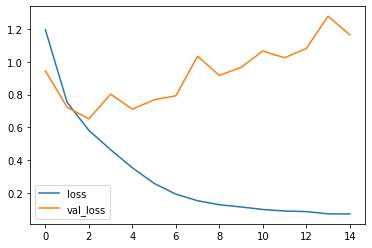

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

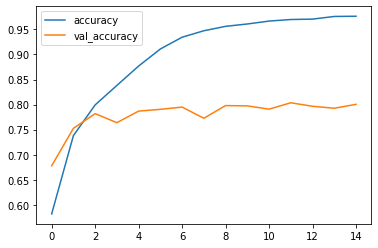

In [12]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion Matrix without Normalize
[[822  19  26  27  10   7   5   4  52  28]
 [  8 884   3   5   0   4   9   4  15  68]
 [ 49   4 699  42  59  36  80  20   6   5]
 [ 16   4  67 591  55 136  83  29  13   6]
 [ 12   2  49  37 788  19  68  21   2   2]
 [ 12   1  48 106  41 715  38  33   3   3]
 [  3   1  16  34  17  11 908   2   6   2]
 [ 14   1  18  25  77  32  15 802   6  10]
 [ 24  17   7   3   4   2  14   2 906  21]
 [ 20  41   5   7   2   3   8   5  19 890]]


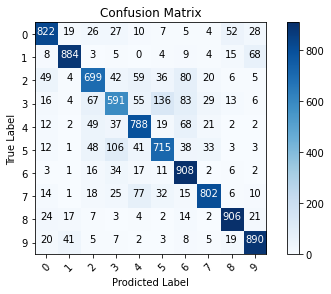

In [13]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  if normalize:
     cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
     print("Normalize matrix")
  else: 
    print("Confusion Matrix without Normalize")

  print(cm)  

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title) 
  plt.colorbar() 
  tick_marks =np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt ='.2f' if normalize else 'd'
  thresh =  cm.max() /2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
              horizontalalignment ="center",
              color='white' if cm [i,j]> thresh else "black")
  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Prodicted Label")
  plt.show()


p_test =model.predict(x_test).argmax(axis =1)
cm= confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [25]:
labels ='''a 
au 
b 
c 
d 
do 
f  
ho 
ship 
truck'''.split()

TypeError: ignored

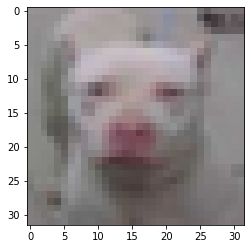

In [21]:
misclassfied_idx= np.where(p_test !=y_test)[0]
i = np.random.choice(misclassfied_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True lable : %s Predicted :%s" % (labels[y_test[i]],labels[p_test[i]]))

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     